# Workshop 1: ลอง Word2Vec Model จาก Google

In [ ]:
import gensim
gensim.__version__

'4.3.1'

In [ ]:
import gensim.downloader as api

In [ ]:
model = api.load('word2vec-google-news-300')
model.vector_size

[=================================================-] 99.6% 1656.0/1662.8MB downloaded


300

In [ ]:
model['dog'].shape

(300,)

In [ ]:
len(model.index_to_key)

3000000

In [ ]:
for index, word in enumerate(model.index_to_key):
  if index == 10:
    break
  print(index, word)

0 </s>
1 in
2 for
3 that
4 is
5 on
6 ##
7 The
8 with
9 said


In [ ]:
try:
  vec = model['deep learn']
except KeyError:
  print('This word dose not appear in this model')

This word dose not appear in this model


In [ ]:
model.similarity('big', 'huge')

0.7809856

In [ ]:
model.similarity('big', 'small')

0.49586785

In [ ]:
model.most_similar('car', topn=8)

[('vehicle', 0.7821096181869507),
 ('cars', 0.7423831224441528),
 ('SUV', 0.7160962224006653),
 ('minivan', 0.6907036900520325),
 ('truck', 0.6735789775848389),
 ('Car', 0.6677608489990234),
 ('Ford_Focus', 0.667320191860199),
 ('Honda_Civic', 0.6626849174499512)]

In [ ]:
pairs = [
    ('car', 'minivan'),
    ('car', 'bicycle'),
    ('car', 'airplane'),
    ('car', 'apple'),
    ('car', 'man')]

for w1, w2 in pairs:
  print('%r\t%r\t%.2f' % (w1, w2, model.similarity(w1, w2)))

'car'	'minivan'	0.69
'car'	'bicycle'	0.54
'car'	'airplane'	0.42
'car'	'apple'	0.13
'car'	'man'	0.24


In [ ]:
model.most_similar(['car', 'minivan'], topn=8)

[('SUV', 0.8532192707061768),
 ('vehicle', 0.8175783753395081),
 ('pickup_truck', 0.7763688564300537),
 ('Jeep', 0.7567334175109863),
 ('Ford_Explorer', 0.7565720081329346),
 ('sedan', 0.7446292042732239),
 ('station_wagon', 0.7440938949584961),
 ('Honda_Civic', 0.7440058588981628)]

In [ ]:
words = ['movie', 'song', 'book', 'music']
model.doesnt_match(words)

'book'

In [ ]:
vec = model['king'] - model['man'] + model['woman']
model.similar_by_vector(vec, topn=8)

[('king', 0.8449392318725586),
 ('queen', 0.7300517559051514),
 ('monarch', 0.645466148853302),
 ('princess', 0.6156251430511475),
 ('crown_prince', 0.5818676352500916),
 ('prince', 0.5777117609977722),
 ('kings', 0.5613663792610168),
 ('sultan', 0.5376775860786438)]

In [ ]:
vec = model['thai'] + model['food']
model.similar_by_vector(vec, topn=8)

[('thai', 0.8111361861228943),
 ('food', 0.6910518407821655),
 ('som_tam', 0.5905162692070007),
 ('khao', 0.5869693756103516),
 ('chinese', 0.5779860019683838),
 ('tom_yam', 0.5763896703720093),
 ('dimsum', 0.5750942826271057),
 ('oyster_omelette', 0.5726006031036377)]

# Workshop 2: ใช้งาน GloVe

In [ ]:
model = api.load('glove-twitter-50')
model

[==================================================] 100.0% 199.5/199.5MB downloaded


In [ ]:
len(model.index_to_key)

1193514

In [ ]:
model.vector_size

50

# Workshop 3: Word Embedding ด้วย Keras

In [ ]:
from keras.preprocessing.text import Tokenizer

In [ ]:
s1 = 'CNN is good'
s2 = 'python is easy and good'
s3 = 'So good so happy enjoy with Python'

sentences = [s1, s2, s3]
sentences

['CNN is good',
 'python is easy and good',
 'So good so happy enjoy with Python']

## ตัดคำและเข้ารหัส

In [ ]:
tk = Tokenizer()
tk.fit_on_texts(sentences)

In [ ]:
tk.document_count

3

In [ ]:
tk.word_docs

defaultdict(int,
            {'good': 3,
             'is': 2,
             'cnn': 1,
             'python': 2,
             'easy': 1,
             'and': 1,
             'enjoy': 1,
             'happy': 1,
             'with': 1,
             'so': 1})

In [ ]:
tk.word_counts

OrderedDict([('cnn', 1),
             ('is', 2),
             ('good', 3),
             ('python', 2),
             ('easy', 1),
             ('and', 1),
             ('so', 2),
             ('happy', 1),
             ('enjoy', 1),
             ('with', 1)])

In [ ]:
tk.word_counts.items()

odict_items([('cnn', 1), ('is', 2), ('good', 3), ('python', 2), ('easy', 1), ('and', 1), ('so', 2), ('happy', 1), ('enjoy', 1), ('with', 1)])

In [ ]:
tk.word_index

{'good': 1,
 'is': 2,
 'python': 3,
 'so': 4,
 'cnn': 5,
 'easy': 6,
 'and': 7,
 'happy': 8,
 'enjoy': 9,
 'with': 10}

In [ ]:
tk.word_index['good']

1

In [ ]:
tk.word_index['is']

2

In [ ]:
sents_enc = tk.texts_to_sequences(sentences)
sents_enc

[[5, 2, 1], [3, 2, 6, 7, 1], [4, 1, 4, 8, 9, 10, 3]]

In [ ]:
print(s1)
tk.texts_to_sequences([s1])

CNN is good


[[5, 2, 1]]

## การเติมให้ความยาวเท่ากัน (Padding)

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
max_len = 6
sents_pad = pad_sequences(sents_enc, truncating='post', padding='post', maxlen=max_len)
print(sents_pad)

[[ 5  2  1  0  0  0]
 [ 3  2  6  7  1  0]
 [ 4  1  4  8  9 10]]


In [ ]:
tk.sequences_to_texts(sents_enc)

['cnn is good',
 'python is easy and good',
 'so good so happy enjoy with python']

In [ ]:
tk.sequences_to_texts(sents_pad)

['cnn is good', 'python is easy and good', 'so good so happy enjoy with']

## Word Embedding

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding

In [ ]:
vocab_size = len(tk.word_index) + 1
print(vocab_size)

11


In [ ]:
embed_len = 5

model = Sequential()
model.add(Embedding(vocab_size, embed_len, input_length=max_len))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 6, 5)              55        
                                                                 
Total params: 55
Trainable params: 55
Non-trainable params: 0
_________________________________________________________________


In [ ]:
vectors = model.predict(sents_pad)
vectors.shape

1/1 [==============================] - 0s 196ms/step


(3, 6, 5)

In [ ]:
print(vectors.round(3))

[[[-0.016 -0.027 -0.004  0.    -0.018]
  [-0.045 -0.018  0.023 -0.005  0.024]
  [ 0.04   0.025  0.017  0.045  0.045]
  [-0.028  0.009  0.048  0.002 -0.044]
  [-0.028  0.009  0.048  0.002 -0.044]
  [-0.028  0.009  0.048  0.002 -0.044]]

 [[ 0.031  0.014  0.001 -0.001  0.013]
  [-0.045 -0.018  0.023 -0.005  0.024]
  [ 0.026 -0.003  0.012 -0.027  0.018]
  [ 0.013 -0.021  0.01   0.015  0.035]
  [ 0.04   0.025  0.017  0.045  0.045]
  [-0.028  0.009  0.048  0.002 -0.044]]

 [[ 0.02  -0.042 -0.02  -0.01  -0.036]
  [ 0.04   0.025  0.017  0.045  0.045]
  [ 0.02  -0.042 -0.02  -0.01  -0.036]
  [-0.047 -0.028  0.011  0.044 -0.044]
  [ 0.003 -0.024 -0.045 -0.021  0.034]
  [-0.011  0.035  0.046  0.02   0.017]]]


In [ ]:
print(vectors[0][0].round(3))

[-0.016 -0.027 -0.004  0.    -0.018]


In [ ]:
print('sentences word Vector')
print('--------------------------')
for i, sents in enumerate(vectors):
  for j, word_v in enumerate(sents):
    words = tk.sequences_to_texts(sents_pad)[i].split()
    if j < len(words):
      print(f'{i+1:6} {words[j]:>8} {word_v.round(3)}')
    else:
      print(f'{i+1:6} {"":>8} {word_v.round(3)}')

sentences word Vector
--------------------------
     1      cnn [-0.016 -0.027 -0.004  0.    -0.018]
     1       is [-0.045 -0.018  0.023 -0.005  0.024]
     1     good [0.04  0.025 0.017 0.045 0.045]
     1          [-0.028  0.009  0.048  0.002 -0.044]
     1          [-0.028  0.009  0.048  0.002 -0.044]
     1          [-0.028  0.009  0.048  0.002 -0.044]
     2   python [ 0.031  0.014  0.001 -0.001  0.013]
     2       is [-0.045 -0.018  0.023 -0.005  0.024]
     2     easy [ 0.026 -0.003  0.012 -0.027  0.018]
     2      and [ 0.013 -0.021  0.01   0.015  0.035]
     2     good [0.04  0.025 0.017 0.045 0.045]
     2          [-0.028  0.009  0.048  0.002 -0.044]
     3       so [ 0.02  -0.042 -0.02  -0.01  -0.036]
     3     good [0.04  0.025 0.017 0.045 0.045]
     3       so [ 0.02  -0.042 -0.02  -0.01  -0.036]
     3    happy [-0.047 -0.028  0.011  0.044 -0.044]
     3    enjoy [ 0.003 -0.024 -0.045 -0.021  0.034]
     3     with [-0.011  0.035  0.046  0.02   0.017]


# Workshop 4: Word2Vec ภาษาไทย

In [ ]:
from gensim.models import Word2Vec

In [ ]:
model = Word2Vec.load('http://www.arts.chula.ac.th/ling/wp-content/uploads/TNCc5model.bin').wv
model.vector_size

100

In [ ]:
len(model.index_to_key)

31078

In [ ]:
model.most_similar('รับประทาน', topn=5)

[('กิน', 0.8338596820831299),
 ('ทาน', 0.7438191175460815),
 ('ปรุง', 0.7300216555595398),
 ('ดื่ม', 0.7109257578849792),
 ('เสิร์ฟ', 0.6651374697685242)]

In [ ]:
model.similarity('รถ', 'ยานพาหนะ')

0.5487546

In [ ]:
pairs = [
    ('รถ', 'ยานพาหนะ'),
    ('รถ', 'เครื่องบิน'),
    ('รถ', 'ข้าวโพด'),
    ('ปลูก', 'ข้าวโพด') ]
for w1, w2 in pairs:
  print('%r\t%r\t%.2f' % (w1, w2, model.similarity(w1, w2)))

'รถ'	'ยานพาหนะ'	0.55
'รถ'	'เครื่องบิน'	0.72
'รถ'	'ข้าวโพด'	0.13
'ปลูก'	'ข้าวโพด'	0.46


In [ ]:
model.doesnt_match(['หนัง', 'เพลง', 'หนังสือ', 'ดนตรี'])

'หนังสือ'

# Workshop 5: การตัดคำไทย

## deepcut

In [ ]:
!pip install -q deepcut

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 9.3 MB/s eta 0:00:00


In [ ]:
import deepcut

In [ ]:
sentence = 'ลองตัดคำได้ดีไหมนะสาวตากลมมานั่งตากลมตากลมประเทศไทย'
word_tk = deepcut.tokenize(sentence)
print(word_tk)

2/2 [==============================] - 1s 13ms/step
['ลอง', 'ตัด', 'คำ', 'ได้', 'ดี', 'ไหม', 'นะ', 'สาว', 'ตา', 'กลม', 'มา', 'นั่ง', 'ตากลม', 'ตากลมประเทศไทย']


## pythainlp

In [ ]:
!pip install pythainlp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 10.1 MB/s eta 0:00:00


In [ ]:
import pythainlp

In [ ]:
word_tk = pythainlp.tokenize.word_tokenize(sentence, engine='deepcut')
print(word_tk)

2/2 [==============================] - 0s 22ms/step
['ลอง', 'ตัด', 'คำ', 'ได้', 'ดี', 'ไหม', 'นะ', 'สาว', 'ตา', 'กลม', 'มา', 'นั่ง', 'ตากลม', 'ตากลมประเทศไทย']


## attacut

In [ ]:
!pip install attacut

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 7.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 9.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 473.8/473.8 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.5/993.5 kB 13.2 MB/s eta 0:00:00
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13707 sha256=a1b46d0d5704baaf83369ac69d5628d2e5eb93bad834690b3e016b26d39e4f97
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
  Created wheel for fire: filename=fire-0.5.0-py2.py3-none-any.whl size=116932 sha256=b26721f1178593a7fe4744624085d116e86664929da5de90bbc4596bca232e52
  Stored in directory: /root/.cache/pip/wheels/90/d4/f7/9404e5db0116bd4d43e5666eaa3e70ab53723e1e3ea40c9a95
Successfully built docopt fire


In [ ]:
from attacut import tokenize

In [ ]:
word_tk = tokenize(sentence)
print(word_tk)

['ลอง', 'ตัด', 'คำ', 'ได้', 'ดี', 'ไหม', 'นะ', 'สาว', 'ตา', 'กลม', 'มา', 'นั่ง', 'ตา', 'กลม', 'ตา', 'กลม', 'ประเทศไทย']


In [ ]:
sentence = 'สาวสาวตากลมนั่งตากลมเขียนโปรแกรมในประเทศไทย'
word_tk = tokenize(sentence)
print(word_tk)

['สาว', 'สาว', 'ตา', 'กลม', 'นั่ง', 'ตา', 'กลม', 'เขียน', 'โปรแกรม', 'ใน', 'ประเทศไทย']


In [ ]:
import numpy as np

In [ ]:
word_tk_unique = np.unique(word_tk)
word_tk_unique.tolist()

['กลม', 'ตา', 'นั่ง', 'ประเทศไทย', 'สาว', 'เขียน', 'โปรแกรม', 'ใน']

In [ ]:
dict_th = {}
def create_thdict(token):
  for idx, wd in enumerate(token):
    dict_th[wd] = idx + 1

word_tk_unique.sort()
create_thdict(word_tk_unique)
dict_th

{'กลม': 1,
 'ตา': 2,
 'นั่ง': 3,
 'ประเทศไทย': 4,
 'สาว': 5,
 'เขียน': 6,
 'โปรแกรม': 7,
 'ใน': 8}

In [ ]:
word_enc = []
for wdi in word_tk:
  word_enc.append(dict_th[wdi])

word_enc

[5, 5, 2, 1, 3, 2, 1, 6, 7, 8, 4]

# Workshop 6: ทำการ Train Word2Vec

In [ ]:
from gensim.models import Word2Vec
from gensim.utils import tokenize
from gensim.parsing.preprocessing import remove_stopwords

In [ ]:
s1 = 'CNN is great.'
s2 = 'Python is a good language.'
s3 = 'You can learn CNN using Python.'
sents = s1 + s2 + s3
sents

'CNN is great.Python is a good language.You can learn CNN using Python.'

In [ ]:
sents = remove_stopwords(sents)
sents_tk = [list(tokenize(sents, deacc = True))]
sents_tk

[['CNN',
  'great',
  'Python',
  'good',
  'language',
  'You',
  'learn',
  'CNN',
  'Python']]

In [ ]:
model = Word2Vec(sents_tk, vector_size=5, window=1, min_count=1, sg=0, workers=4, epochs=40)
print(model)

Word2Vec<vocab=7, vector_size=5, alpha=0.025>


In [ ]:
for index, word in enumerate(model.wv.index_to_key):
  if index == 10:
    break
  print(index, word)

0 Python
1 CNN
2 learn
3 You
4 language
5 good
6 great


In [ ]:
model.wv.most_similar('good')

[('great', 0.93242347240448),
 ('CNN', 0.7743226289749146),
 ('You', 0.7670735716819763),
 ('Python', -0.00010634276259224862),
 ('language', -0.15319672226905823),
 ('learn', -0.6142301559448242)]

In [ ]:
pairs = [
    ('good', 'great'),
    ('CNN', 'great'),
    ('CNN', 'good'),
    ('learn', 'Python'),
    ('language', 'You')
]

for w1, w2 in pairs:
  print('{:>8} {:8} {:6.3f}'.format(w1, w2, model.wv.similarity(w1, w2)))

    good great     0.932
     CNN great     0.851
     CNN good      0.774
   learn Python    0.459
language You      -0.347


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
labels = np.asarray(model.wv.index_to_key)
labels.shape

(7,)

In [ ]:
print(labels)

['Python' 'CNN' 'learn' 'You' 'language' 'good' 'great']


In [ ]:
vectors = np.asarray(model.wv.vectors)
vectors.shape

(7, 5)

In [ ]:
print(vectors.round(3))

[[-0.011  0.005  0.102  0.18  -0.186]
 [-0.142  0.129  0.18  -0.1   -0.075]
 [ 0.148 -0.031 -0.091  0.131 -0.097]
 [-0.036  0.058  0.02  -0.166 -0.189]
 [ 0.146  0.101  0.135  0.015  0.127]
 [-0.068 -0.019  0.115 -0.15  -0.079]
 [-0.15  -0.019  0.191 -0.146 -0.047]]


In [ ]:
from sklearn.decomposition import PCA

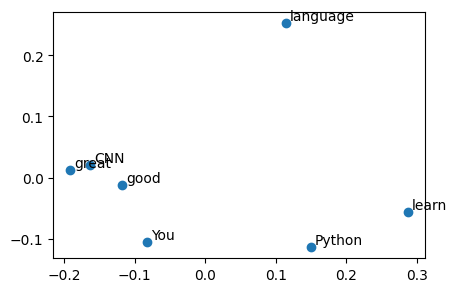

In [ ]:
plt.figure(figsize=(4.8, 3.2))

pca = PCA(n_components=2)
result = pca.fit_transform(vectors)
plt.scatter(result[:, 0], result[:, 1])

for i, label in enumerate(labels):
  plt.annotate(label, xy=(result[i, 0]+.005, result[i, 1]+.005))

plt.show()

In [ ]:
model.save('myword2vec.model')

In [ ]:
trained_model = Word2Vec.load('myword2vec.model')
trained_model.wv.most_similar('good')

[('great', 0.93242347240448),
 ('CNN', 0.7743226289749146),
 ('You', 0.7670735716819763),
 ('Python', -0.00010634276259224862),
 ('language', -0.15319672226905823),
 ('learn', -0.6142301559448242)]

# Workshop 7: สร้างระบบแนะนำสินค้า

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from gensim.models import Word2Vec
from gensim.models.callbacks import CallbackAny2Vec

In [ ]:
cols = 'a:d, g'
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Deep Learning/online_retail_II.xlsx', dtype={'Customer ID':str, 'Invoice':str})

## ตรวจสอบข้อมูล

In [ ]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom


In [ ]:
df.sample(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
293402,517977,22537,MAGIC DRAWING SLATE DINOSAUR,2,2010-08-03 14:23:00,0.42,16938,United Kingdom
9836,490149,82616C,MIDNIGHT GLAMOUR SCARF KNITTING KIT,2,2009-12-04 09:43:00,2.57,NaN,United Kingdom
185990,507116,46776B,WOVEN BERRIES CUSHION COVER,1,2010-05-06 11:30:00,4.21,NaN,United Kingdom
455042,532617,22719,GUMBALL MONOCHROME COAT RACK,2,2010-11-12 15:23:00,2.51,NaN,United Kingdom
119419,500827,21538,DAIRY MAID PUDDING BOWL,2,2010-03-10 11:10:00,7.62,NaN,United Kingdom
107687,499757,21593,SWALLOW CIGAR BOX MATCHES,5,2010-03-02 12:18:00,1.25,17377,United Kingdom
452512,532382,22158,3 HEARTS HANGING DECORATION RUSTIC,3,2010-11-11 18:24:00,2.95,16081,United Kingdom
344255,522967,21357,TOAST ITS - DINOSAUR,5,2010-09-19 13:02:00,1.25,18257,United Kingdom
362761,524522,84879,ASSORTED COLOUR BIRD ORNAMENT,8,2010-09-29 13:14:00,1.69,14911,EIRE
384163,526298,22411,JUMBO SHOPPER VINTAGE RED PAISLEY,5,2010-10-11 12:00:00,1.95,14590,United Kingdom


In [ ]:
df.tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530,United Kingdom
525460,538171,21931,JUMBO STORAGE BAG SUKI,2,2010-12-09 20:01:00,1.95,17530,United Kingdom


In [ ]:
df.groupby('Quantity').size()

Quantity
-9600     1
-9360     1
-9200     1
-9000     2
-8800     1
         ..
 10200    1
 12480    1
 12744    1
 12960    2
 19152    1
Length: 825, dtype: int64

In [ ]:
df.describe().round(2)

,Quantity,Price
count,525461.00,525461.00
mean,10.34,4.69
std,107.42,146.13
min,-9600.00,-53594.36
25%,1.00,1.25
50%,3.00,2.10
75%,10.00,4.21
max,19152.00,25111.09


In [ ]:
df.shape

(525461, 8)

In [ ]:
df.groupby('Customer ID').count().sort_values('Invoice', ascending=False).Invoice.head(10)

Customer ID
14911    5710
17841    5114
14606    3927
14156    2710
12748    2665
17850    2515
16549    2274
15311    2226
14527    1826
14646    1805
Name: Invoice, dtype: int64

In [ ]:
df.isnull().sum()

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

## เตรียมข้อมูลเบื้องต้น

In [ ]:
df[df.Quantity < 0].count()

Invoice        12326
StockCode      12326
Description    10499
Quantity       12326
InvoiceDate    12326
Price          12326
Customer ID     9839
Country        12326
dtype: int64

In [ ]:
df = df[df.Quantity > 0]
df.shape

(513135, 8)

In [ ]:
df['Customer ID'] = df['Customer ID'].astype(str)
df['StockCode'] = df['StockCode'].astype(str)
df['Invoice'] = df['Invoice'].astype(str)

In [ ]:
df_invo1 = df.groupby('Invoice').count().Quantity.sort_values()
df_invo1

Invoice
C496350      1
522133       1
522134       1
498732       1
522139       1
          ... 
536876     593
537237     597
537638     601
538071     652
537434     675
Name: Quantity, Length: 22104, dtype: int64

In [ ]:
frame = {'Invoice': df_invo1.index, 'Count': df_invo1.values}

res = pd.DataFrame(frame)
invoices_small = res[res.Count <= 1].Invoice.tolist()
invoices_small[:10]

['C496350',
 '522133',
 '522134',
 '498732',
 '522139',
 '498727',
 '522171',
 '498747',
 '522207',
 '522287']

In [ ]:
df = df[df.Invoice.apply(lambda x: x not in invoices_small)]
df.shape

(509886, 8)

In [ ]:
df.groupby('Invoice').count().Quantity.sort_values()

Invoice
522160      2
515304      2
501169      2
515189      2
528055      2
         ... 
536876    593
537237    597
537638    601
538071    652
537434    675
Name: Quantity, Length: 18855, dtype: int64

## เตรียม Dataset

In [ ]:
customers = df.Invoice.unique().tolist()
print(len(customers))
customers[:6]

18855


['489434', '489435', '489436', '489437', '489438', '489439']

In [ ]:
customers_train = [customers[i] for i in range(len(customers[:round(0.9 * len(customers))]))]
customers_validation = [customers[i] for i in range(len(customers[round(0.9 * len(customers)):]))]
train_df = df[df['Invoice'].isin(customers_train)]
validation_df = df[df['Invoice'].isin(customers_validation)]

In [ ]:
purchases_train = []
for i in tqdm(customers_train):
  temp = train_df[train_df.Invoice == i]['StockCode'].tolist()
  purchases_train.append(temp)

100%|██████████| 16970/16970 [16:41<00:00, 16.94it/s]


## Train

In [ ]:
from IPython.display import clear_output

In [ ]:
class MonitorCallback(CallbackAny2Vec):
  def __init__(self):
    self.epoch = 0
    clear_output(wait=True)
    print('Start ...')

  def on_epoch_begin(self, model):
    pass

  def on_epoch_end(self, model):
    clear_output(wait=True)
    print('Epoch #{}/{}'.format(self.epoch+1, model.epochs))
    self.epoch += 1

monitor = MonitorCallback()

model = Word2Vec(purchases_train, vector_size=50, window=5, sg=1, workers=4, epochs=40, callbacks=[monitor])

Epoch #40/40


In [ ]:
print(model)
model.wv.index_to_key[:6]

Word2Vec<vocab=3690, vector_size=50, alpha=0.025>


['85123A', '85099B', '22423', '21212', '21232', '20725']

In [ ]:
model.wv['22423']

array([-0.06820589,  0.13739681,  0.18785165,  0.03272855, -0.49724168,
        0.00472882,  0.5194343 ,  0.56266993, -0.19137207,  0.23766223,
        0.03791911,  0.01268964,  0.48348817,  0.08812957, -0.22039397,
       -0.03516836,  0.25813338,  0.16671148,  0.16047813,  0.34647346,
        0.9504984 , -0.07331371,  0.13250713,  0.00701998, -0.11160311,
        0.1761901 ,  0.00232854, -0.3110167 , -0.374317  , -0.08659595,
        0.40402988, -0.0573521 , -0.11892529, -0.2819011 ,  0.07559276,
       -0.26671156,  0.20755434, -0.47656646, -0.13763309, -0.0340216 ,
       -0.18742761, -0.09184159,  0.0311852 ,  0.02144992,  0.24584234,
       -0.5713409 ,  0.165974  , -0.23008496,  0.18204138, -0.08378564],
      dtype=float32)

In [ ]:
model.save('amazon_store.model')

## ใช้งานแนะนำสินค้า

In [ ]:
model.wv.most_similar('22613', topn=5)

[('21094', 0.6778076887130737),
 ('22614', 0.6690829396247864),
 ('21080', 0.6631714701652527),
 ('22635', 0.6612839698791504),
 ('21989', 0.6566370129585266)]

In [ ]:
products = train_df[['StockCode', 'Description']]

products.drop_duplicates(inplace=True, subset='StockCode', keep='last')
products[:5]

<ipython-input-68-2dd0bcd594f3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  products.drop_duplicates(inplace=True, subset='StockCode', keep='last')


,StockCode,Description
440,35751C,PURPLE CURRENT CANDLE RING
1343,84648,NEW BAROQUE WALL MIRROR
1808,21767,FRENCH STYLE WIRE DOOR CABINET
1898,20739,*USB Office Glitter Lamp
2201,30086C,ASSORTED FRUIT STRAWS


import numpy as np
from google.colab import autoviz
df_3988109845070907726 = autoviz.get_df('df_3988109845070907726')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_3988109845070907726, *['StockCode'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3988109845070907726 = autoviz.get_df('df_3988109845070907726')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_3988109845070907726, *['Description'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3988109845070907726 = autoviz.get_df('df_3988109845070907726')

def heatmap(df, x_colname, y_colname, figsize=(2, 2), mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=figsize)
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(df_3988109845070907726, *['StockCode', 'Description'], **{})
chart

In [ ]:
products_dict = products.groupby('StockCode')['Description'].apply(list).to_dict()
products_dict['21767']

['FRENCH STYLE WIRE DOOR CABINET ']

In [ ]:
sku_now = '15044C'
similars = model.wv.most_similar(sku_now, topn=7)

print('Shopping:', sku_now, products_dict[sku_now][0])
print('---------------------------------------------------')

for i in similars:
  if i[1] > 0.6:
    print('{:6} {:36} {:3f}'.format(i[0], products_dict[i[0]][0], i[1]))

Shopping: 15044C PURPLE PAPER PARASOL
---------------------------------------------------
15044D RED PAPER PARASOL                    0.889076
15044B BLUE PAPER PARASOL                   0.885975
15044A PINK PAPER PARASOL                   0.844830
15039  SANDALWOOD FAN                       0.757779
15036  ASSORTED COLOURS SILK FAN            0.752414
15056N EDWARDIAN PARASOL NATURAL            0.683483
15034  PAPER POCKET TRAVELING FAN           0.655966


In [ ]:
sku_now = ['84997B', '22139']
similars = model.wv.most_similar(sku_now, topn=7)

print('Shopping:', sku_now, products_dict[sku_now[0]], products_dict[sku_now[1]])
print('---------------------------------------------------')

for i in similars:
  if i[1] > 0.6:
    print('{:6} {:36} {:3f}'.format(i[0], products_dict[i[0]][0], i[1]))

Shopping: ['84997B', '22139'] ['RED 3 PIECE RETROSPOT CUTLERY SET'] ['RETROSPOT TEA SET CERAMIC 11 PC ']
---------------------------------------------------
84997C BLUE 3 PIECE POLKADOT CUTLERY SET    0.813470
84997D PINK 3 PIECE POLKADOT CUTLERY SET    0.808148
84997A GREEN 3 PIECE POLKADOT CUTLERY SET   0.803181
22138  BAKING SET 9 PIECE RETROSPOT         0.792771
22618  COOKING SET RETROSPOT                0.738901
22617  BAKING SET SPACEBOY DESIGN           0.737963
22634  CHILDS BREAKFAST SET SPACEBOY        0.660093


## Visual Plot

In [ ]:
labels = np.asarray(model.wv.index_to_key)
labels.shape

(3690,)

In [ ]:
labels[:10]

array(['85123A', '85099B', '22423', '21212', '21232', '20725', '84991',
       '84879', '21754', '20914'], dtype='<U12')

In [ ]:
vectors = np.asarray(model.wv.vectors)
vectors.shape

(3690, 50)

In [ ]:
from sklearn.decomposition import PCA

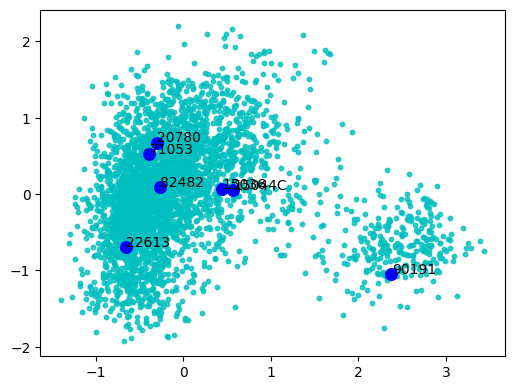

In [ ]:
lst_chk = ['22613', '20780', '23355', '71053', '90191', '82482', '15036', '15036', '15044C']

pca = PCA(n_components=2)
result = pca.fit_transform(vectors)
plt.figure(figsize=(6, 4.5))
plt.scatter(result[:, 0], result[:, 1], s=10, alpha=.8, c='c')

for i, label in enumerate(labels):
  if label in lst_chk:
    plt.scatter(result[i][0], result[i][1], s=70, c='b')
    plt.annotate(label, xy=(result[i, 0]+.005, result[i, 1]+.005))

plt.show()